<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/medical_cost_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Load csv
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
insurance_encoded = pd.get_dummies(insurance)
insurance_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [10]:
# Create features and labels
x = insurance_encoded.drop("charges", axis = 1)
y = insurance_encoded["charges"]

In [11]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [12]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [14]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [39]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mse"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history = insurance_model.fit(x_train, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
34/34 [==============================] - 1s 1ms/step - loss: 11426.4395 - mse: 270471424.0000
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 7556.0015 - mse: 154448272.0000
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 7317.6108 - mse: 151469424.0000
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 7099.3921 - mse: 155248640.0000
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 6843.2866 - mse: 153845232.0000
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 6593.5117 - mse: 154124976.0000
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 6475.5815 - mse: 151979552.0000
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 6301.3525 - mse: 147236256.0000
Epoch 9/1000
34/34 [==============================] - 0s 1ms/step - loss: 6146.5898 - mse: 141564000.0000
Epoch 10/1000
34/34 [========================

Text(0.5, 0, 'epochs')

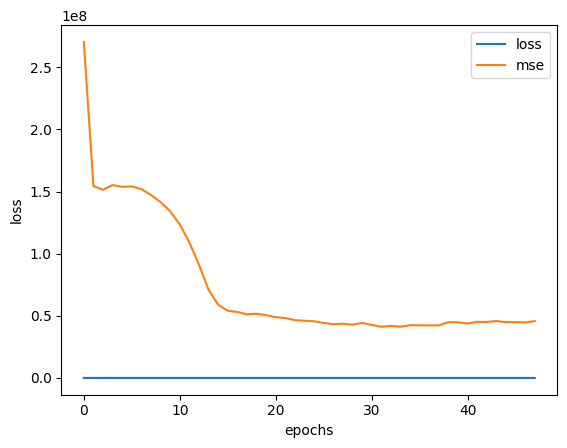

In [40]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

<Axes: ylabel='Frequency'>

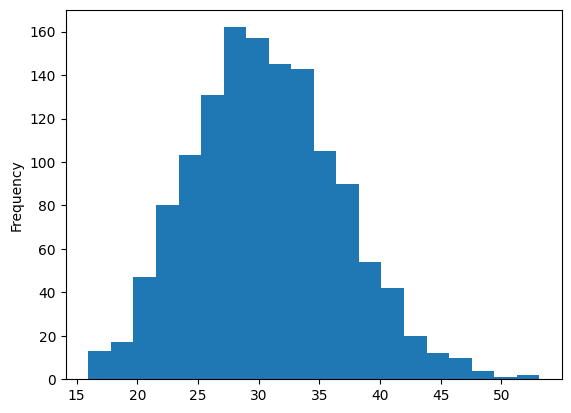

In [43]:
x["bmi"].plot(kind="hist", bins=20)

In [82]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Load csv
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.drop("region", axis=1)

# Feature scaling
# Normalization: Converts the values into floats in (0, 1) range

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

# Create a column transformer
ct = make_column_transformer(
    (StandardScaler(), ["bmi"]),
    (MinMaxScaler(), ["age", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker"])
)

# Create x and y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit column transformer to training data
ct.fit(x_train)

# Transform training and test data with normalization and encoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [83]:
# Check what the data looks like
x_train_normal[0]

array([-1.75652513,  0.60869565,  0.4       ,  1.        ,  0.        ,
        1.        ,  0.        ])

In [84]:
x_train_normal.shape

(1070, 7)

In [88]:
# Build a neural network on the normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(7),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# 3. Fit the model
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=5, patience=50)
history = insurance_model.fit(
    x_train_normal,
    y_train,
    epochs=1000,
    # callbacks=[callback]
)

Epoch 1/1000
34/34 [==============================] - 1s 2ms/step - loss: 13341.3154 - mae: 13341.3154
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 13327.9580 - mae: 13327.9580
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 13302.1211 - mae: 13302.1211
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 13261.4248 - mae: 13261.4248
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 13204.9404 - mae: 13204.9404
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 13132.2715 - mae: 13132.2715
Epoch 7/1000
34/34 [==============================] - 0s 1ms/step - loss: 13043.4541 - mae: 13043.4541
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 12938.5742 - mae: 12938.5742
Epoch 9/1000
34/34 [==============================] - 0s 1ms/step - loss: 12817.4658 - mae: 12817.4658
Epoch 10/1000
34/34 [==============================] - 0s 1ms/step - loss

In [89]:
insurance_model.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3184.3186 - mae: 3184.3186


[3184.318603515625, 3184.318603515625]